In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [66]:
df1 = pd.read_csv('review_train.csv')
df2 = pd.read_csv('review_test.csv')

In [59]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def preprocess_text(text):
  text = text.lower()
  text = "".join([char for char in text if char.isalnum() or " " in char])
  stop_words = stopwords.words('english')
  text = [word for word in text.split() if word not in stop_words]
  stemmer = PorterStemmer()
  text = [stemmer.stem(word) for word in text]
  return " ".join(text)

df1['Review'] = df1['Review'].apply(preprocess_text)

In [67]:
X_train, X_test, y_train, y_test = train_test_split(df1['Review'],
                                                    df1['Rating'],
                                                    test_size=0.1,
                                                    random_state=3,
                                                    stratify=df1['Rating']
                                                   )


param_grid = {'tfidf__max_features': [10000,20000, 40000],
              'clf__C': [0.075, 0.1, 1],
              'clf__loss': ('hinge', 'squared_hinge')}

pipe = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC(random_state=0))])
clf = GridSearchCV(pipe, param_grid, cv=5)


clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("Best Hyperparameters:", clf.best_params_)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'clf__C': 0.075, 'clf__loss': 'squared_hinge', 'tfidf__max_features': 20000}
Accuracy: 56.25%
              precision    recall  f1-score   support

      1 star       0.59      0.67      0.63       203
      2 star       0.49      0.46      0.48       218
      3 star       0.53      0.44      0.48       195
      4 star       0.54      0.50      0.52       195
      5 star       0.65      0.74      0.69       197

    accuracy                           0.56      1008
   macro avg       0.56      0.56      0.56      1008
weighted avg       0.56      0.56      0.56      1008



Confusion Matrix for LinearSVC

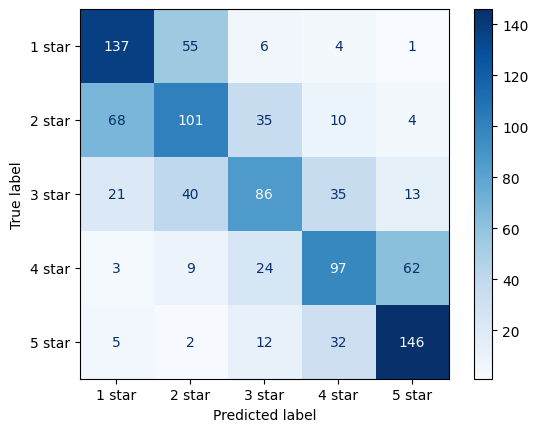

In [68]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

TASK F

Predict Ratings on the test file

In [74]:
final_df = df2[['Review', 'Review_id']].copy()
final_df['Ratings'] = clf.predict(final_df['Review'])

Drop Review Column and Save Final predicted Output as CSV

In [78]:
final_df.drop(columns=['Review'], inplace=True)
final_df.to_csv('Group17_QBUS6850_2024S1.csv', index=False)